In [1]:
# Imports
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
def coin_regions(img, x1, y1, x2, y2):
    #x_distance = int(d.right() - d.left())
    #y_distance = int(d.bottom() - d.top())

    #center = (int(d.left()) + int(x_distance/2), int(d.top()) + int(y_distance/2))
    #radius = int(x_distance/2)
    
    return img[y1:y2, x1:x2]

In [3]:
def main():
    # hog_detector made with dlib. More trainning improves detection
    detector = dlib.simple_object_detector("hog_detector.svm")

    # show generalized HOG model for a coin
    win_det = dlib.image_window()
    win_det.set_image(detector)
    
    img = cv2.imread('../images/coin1.png')
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 2)

    rects = detector(blur)
    
    print('Coins: {}'.format(len(rects)))
    coins = []
    for k, d in enumerate(rects):
        coins.append(coin_regions(img, d.left(), d.top(), d.right(), d.bottom()))

    for coin in coins:
        plt.imshow(coin[:, :, ::-1])
        plt.show()
        
    plt.imshow(img[:, :, ::-1])
    plt.show()

Coins: 8


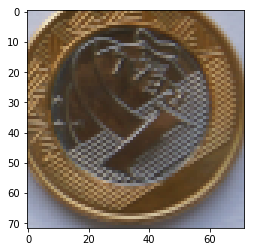

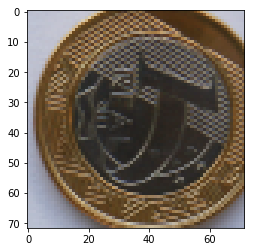

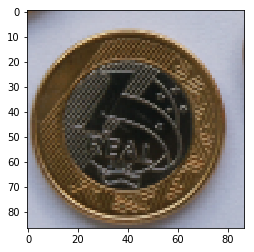

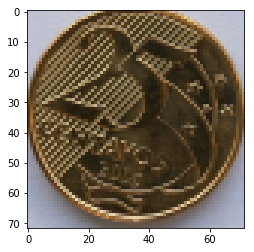

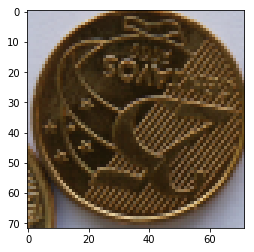

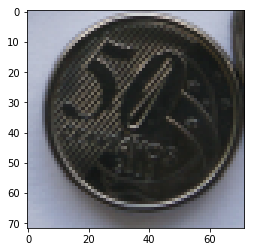

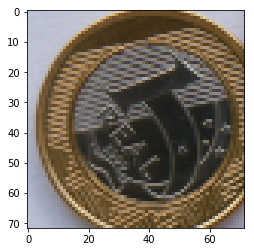

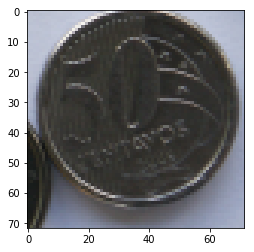

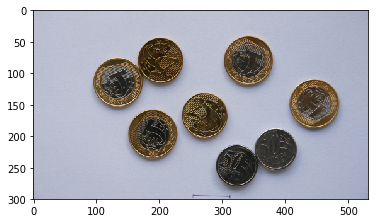

In [4]:
if __name__ == '__main__':
    main()